In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [15]:

df = pd.read_csv("dataset_sudeste_simples_realista_outliers-2k.csv")
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   idade      986 non-null    float64
 2   renda      987 non-null    float64
 3   cidade     987 non-null    object 
 4   categoria  991 non-null    object 
 5   nota       988 non-null    float64
 6   feedback   995 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [16]:
df.describe()

,id,idade,renda,nota
count,1000.000000,986.000000,987.000000,988.000000
mean,500.500000,42.900609,7096.179007,4.972470
std,288.819436,16.402187,3734.792574,2.953104
min,1.000000,10.000000,997.280000,-4.900000
25%,250.750000,28.000000,4136.840000,2.500000
50%,500.500000,42.500000,6912.380000,5.000000
75%,750.250000,57.000000,10040.795000,7.525000
max,1000.000000,107.000000,42714.950000,14.700000


In [17]:
print(df.isnull().sum())

id            0
idade        14
renda        13
cidade       13
categoria     9
nota         12
feedback      5
dtype: int64


In [18]:
imputer_media = SimpleImputer(strategy='mean')
df[['idade', 'nota']] = imputer_media.fit_transform(df[['idade', 'nota']])

In [19]:
imputer_mediana = SimpleImputer(strategy='median')
df[['renda']] = imputer_mediana.fit_transform(df[['renda']])

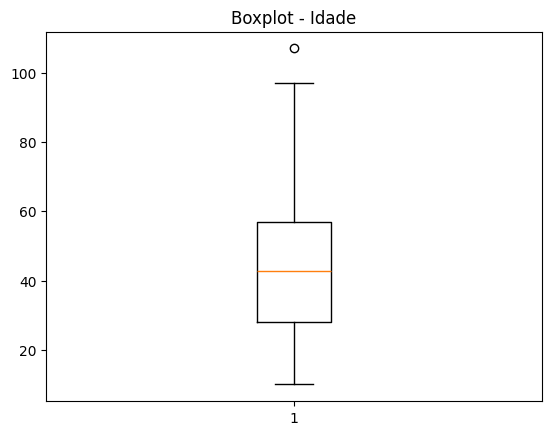

In [20]:
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

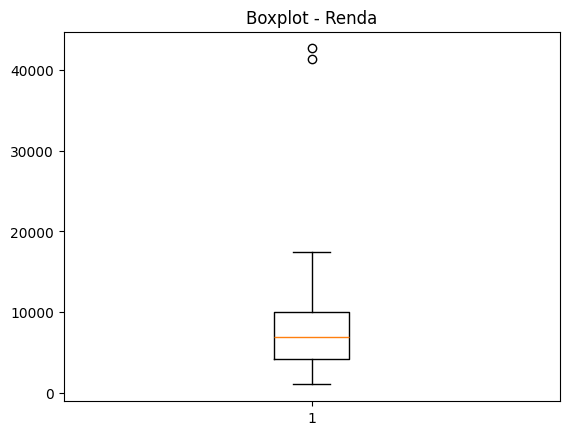

In [21]:
plt.boxplot(df['renda'])
plt.title("Boxplot - Renda")
plt.show()

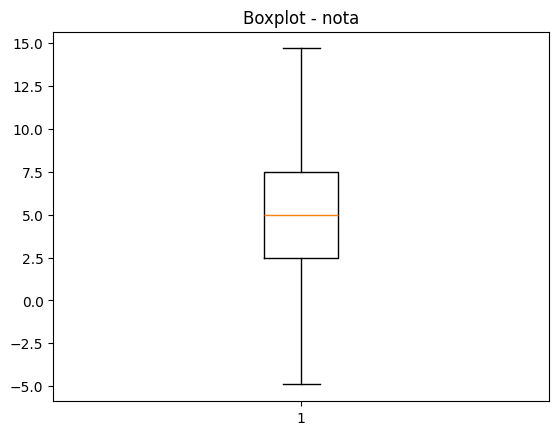

In [22]:
plt.boxplot(df['nota'])
plt.title("Boxplot - nota")
plt.show()

In [23]:
Q1 = df['renda'].quantile(0.25)
Q3 = df['renda'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"\n\n\t IQR - Campo Renda\n\n")
print(f"Quartis -> Q1: {Q1:-8.2f}  ->  Q3: {Q3:-8.2f}")
print(f"IQR ----- {IQR}")
print(f"Limites - Inf: {limite_inferior:-8.2f}  -> Sup: {limite_superior:-8.2f}\n\n")

outliers = df[(df['renda'] < limite_inferior) | (df['renda'] > limite_superior)]
print(f"\n### Possíveis outliers em 'renda' ###\n\n{outliers}\n")



	 IQR - Campo Renda


Quartis -> Q1:  4143.17  ->  Q3: 10002.69
IQR ----- 5859.525
Limites - Inf: -4646.12  -> Sup: 18791.98



### Possíveis outliers em 'renda' ###

      id  idade     renda          cidade categoria  nota feedback
76    77  107.0  42714.95  Rio de Janeiro         A  -4.9      Bom
125  126   11.0  41352.49  Rio de Janeiro         A  14.7     Ruim



In [26]:
df['cidade'] = df['cidade'].fillna("Desconhecido")
df['categoria'] = df['categoria'].fillna("Desconhecido")
df['feedback'] = df['feedback'].fillna("Desconhecido")
df['idade'] = df['idade'].fillna(df['idade'].median())
df['renda'] = df['renda'].fillna(df['renda'].median())
df['nota']  = df['nota'].fillna(df['nota'].mean())

In [27]:
df.isnull().sum()

id           0
idade        0
renda        0
cidade       0
categoria    0
nota         0
feedback     0
dtype: int64

In [28]:
df['feedback_Bom'] = (df['feedback'] == 'Bom').astype(int)
df.head(5)

,id,idade,renda,cidade,categoria,nota,feedback,feedback_Bom
0,1,36.0,6679.16,São Paulo,B,5.4,Bom,1
1,2,29.0,9274.41,Vitória,Desconhecido,8.8,Regular,0
2,3,68.0,4236.21,Belo Horizonte,B,4.4,Regular,0
3,4,67.0,8833.66,São Paulo,A,4.9,Bom,1
4,5,34.0,9373.70,Vitória,B,3.1,Bom,1
